<a href="https://colab.research.google.com/github/smiledinisa/data_python_analysis/blob/master/pandas007_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My Drive

/content/drive/My Drive


# CHAPTER 11 :Time Series

 you may have one of the  


following:  
• Timestamps, specific instants in time  
• Fixed periods, such as the month January 2007 or the full year 2010  
• Intervals of time, indicated by a start and end timestamp. Periods can be   thought  
of as special cases of intervals  
• Experiment or elapsed time; each timestamp is a measure of time relative to a  
particular start time (e.g., the diameter of a cookie baking each second since  
being placed in the oven)  


时间索引类型：

时间戳。

时间段。

时间间隔。

累计时间间隔。





## 11.1 Date and Time Data Types and Tools


![链接文字](https://img-blog.csdnimg.cn/20200821163726427.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2dhb2N1aTg4Mw==,size_16,color_FFFFFF,t_70#pic_center)

In [ ]:
# 基础的一些时间类模块。

from datetime import datetime

In [ ]:
now = datetime.now()
now

datetime.datetime(2020, 8, 21, 8, 39, 12, 36627)

In [ ]:
now.year


2020

In [ ]:
delta = datetime(2011,1,5) - datetime(2010,2,3,12,8,3)
delta

datetime.timedelta(335, 42717)

In [ ]:
delta.days

335

In [ ]:
from datetime import timedelta
start = datetime(2011,1,7)

x = start + timedelta(13)
print(x)

y = start - 2*timedelta(12)
print(y)

2011-01-20 00:00:00
2010-12-14 00:00:00


In [ ]:
x.isoformat()

'2011-01-20T00:00:00'

In [ ]:
x.isocalendar() # 返回year,week,day.

(2011, 3, 4)

In [ ]:
x.weekday() # 星期4.     0 - 6 星期1到天。

3

In [ ]:
x.ctime() # 返回一个日期字符串。

'Thu Jan 20 00:00:00 2011'

In [ ]:
x.strftime('%Y-%m-%d')

'2011-01-20'

### Converting Between String and Datetime


字符串和时间时间的转换。


![链接文字](https://img-blog.csdnimg.cn/20200821171946921.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2dhb2N1aTg4Mw==,size_16,color_FFFFFF,t_70#pic_center)


![链接文字](https://img-blog.csdnimg.cn/20200821173940899.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2dhb2N1aTg4Mw==,size_16,color_FFFFFF,t_70#pic_center)

In [ ]:
# datetime.strptime
# dateutil.parser import parse
# 

In [ ]:
# 直接用str,strftime method 来进行时间和字符串的转换。

stamp = datetime(2011, 1, 3)

stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [ ]:
str(stamp)  #str 模式。

'2011-01-03 00:00:00'

In [ ]:
stamp.strftime('%Y-%m-%d') # str format time 

'2011-01-03'

In [ ]:
# 来识别特定格式的字符串时间序列。 
# 关键字strptime  str pass time

value = '2011-01-03'

datetime.strptime(value, '%Y-%m-%d') # 得到特定格式的时间字符串，转换成datatime 类型。

datetime.datetime(2011, 1, 3, 0, 0)

In [ ]:
datestrs = ['7/6/2011', '8/6/2011']

[datetime.strptime(x, '%m-%d-%Y') for x in datestrs]  

ValueError: ignored

In [ ]:
# 从上边的结果可以看出，如果格式不符合，无法进行转换。

[datetime.strptime(x, '%m/%d/%Y') for x in datestrs] # 将一个是按序列字符串的list进行转换成datetime的list

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [ ]:
# 问题： 还有更加便捷的方法没？？？？有。

# 第三方库， dateutil 的时间解析库parser.parse 可以识别大部分人类能够识别的时间字符串格式。

value = '2011-01-03'

from dateutil.parser import parse

value_date = parse(value)

value_date

datetime.datetime(2011, 1, 3, 0, 0)

In [ ]:
time = 'Jan 31, 1997 10:45 PM'

parse(time)

datetime.datetime(1997, 1, 31, 22, 45)

In [ ]:
time = '2020.10.18'
parse(time) # 真的很方便？？？？

datetime.datetime(2020, 10, 18, 0, 0)

In [ ]:
# 如果想要按照某种格式，将天放在月前。

parse(time, dayfirst = True)

datetime.datetime(2020, 10, 18, 0, 0)

In [ ]:
## 另一种，pandas自带的， pd.to_datetime()

datestrs = ['2011-07-06', '2011-08-06']

import pandas as pd

pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [ ]:
pd.to_datetime(datestrs+[None]) # Nat 表示not time

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

## 2020.8.22

## 11.2 Time Series Basics

In [ ]:
# A basic kind of time series object in pandas is a Series indexed by timestamps, which
# is often represented external to pandas as Python strings or  datetime objects:


# 在外部表现为字符串或者时间对象。

from datetime import datetime
import pandas as pd

import numpy as np



In [ ]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
      datetime(2011, 1, 7), datetime(2011, 1, 8),
      datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts =  pd.Series(np.random.randn(6), index=dates)

ts

2011-01-02    0.543875
2011-01-05   -0.538065
2011-01-07   -0.055432
2011-01-08   -0.235359
2011-01-10   -0.252591
2011-01-12   -0.080231
dtype: float64

In [ ]:
# like other arithmetic operations between diffrent indexed time series auto matically align on the dates:
# 与其他index相同，timeindex 也可以自动对齐。

x = ts[::2]
x

2011-01-02    0.543875
2011-01-07   -0.055432
2011-01-10   -0.252591
dtype: float64

In [ ]:
x+ ts # 没有对齐的显示为NaN

2011-01-02    1.087750
2011-01-05         NaN
2011-01-07   -0.110865
2011-01-08         NaN
2011-01-10   -0.505181
2011-01-12         NaN
dtype: float64

In [ ]:
# 十亿分之一毫秒。
ts.index.dtype

dtype('<M8[ns]')

In [ ]:
# DateIndex object sigal are Timestamp object:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

索引，选择，子集。




In [ ]:
# 时间索引也可以向其他索引一样，用索引来访问数据。
stamp = ts.index[2]
ts[stamp]


-0.055432342170292054

In [ ]:
ts['1/10/2011']

-0.25259063834559614

In [ ]:
stamp

Timestamp('2011-01-07 00:00:00')

In [ ]:
ts['20110110']# padas 索引能够识别各种字符串

-0.25259063834559614

In [ ]:
# slices 切片
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/2/2000', periods=1000))
longer_ts

2000-01-02   -0.528778
2000-01-03   -0.128215
2000-01-04   -0.766332
2000-01-05    1.522631
2000-01-06    0.676500
                ...   
2002-09-23   -0.159826
2002-09-24   -0.755058
2002-09-25    0.280533
2002-09-26    0.325927
2002-09-27    0.181460
Freq: D, Length: 1000, dtype: float64

In [ ]:
pd.date_range?

In [ ]:
Signature: pd.date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs) -> pandas.core.indexes.datetimes.DatetimeIndex
Docstring:
Return a fixed frequency DatetimeIndex.

Parameters
----------
start : str or datetime-like, optional
    Left bound for generating dates.
end : str or datetime-like, optional
    Right bound for generating dates.
periods : int, optional
    Number of periods to generate.
freq : str or DateOffset, default 'D'
    Frequency strings can have multiples, e.g. '5H'. See
    :ref:`here <timeseries.offset_aliases>` for a list of
    frequency aliases.
tz : str or tzinfo, optional
    Time zone name for returning localized DatetimeIndex, for example
    'Asia/Hong_Kong'. By default, the resulting DatetimeIndex is
    timezone-naive.
normalize : bool, default False
    Normalize start/end dates to midnight before generating date range.
name : str, default None
    Name of the resulting DatetimeIndex.
closed : {None, 'left', 'right'}, optional
    Make the interval closed with respect to the given frequency to
    the 'left', 'right', or both sides (None, the default).
**kwargs
    For compatibility. Has no effect on the result.

Returns
-------
rng : DatetimeIndex

See Also
--------
DatetimeIndex : An immutable container for datetimes.
timedelta_range : Return a fixed frequency TimedeltaIndex.
period_range : Return a fixed frequency PeriodIndex.
interval_range : Return a fixed frequency IntervalIndex.

Notes
-----
Of the four parameters ``start``, ``end``, ``periods``, and ``freq``,
exactly three must be specified. If ``freq`` is omitted, the resulting
``DatetimeIndex`` will have ``periods`` linearly spaced elements between
``start`` and ``end`` (closed on both sides).

To learn more about the frequency strings, please see `this link
<https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases>`__.

Examples
--------
**Specifying the values**

The next four examples generate the same `DatetimeIndex`, but vary
the combination of `start`, `end` and `periods`.

Specify `start` and `end`, with the default daily frequency.

>>> pd.date_range(start='1/1/2018', end='1/08/2018')
DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

Specify `start` and `periods`, the number of periods (days).

>>> pd.date_range(start='1/1/2018', periods=8)
DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

Specify `end` and `periods`, the number of periods (days).

>>> pd.date_range(end='1/1/2018', periods=8)
DatetimeIndex(['2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30', '2017-12-31', '2018-01-01'],
              dtype='datetime64[ns]', freq='D')

Specify `start`, `end`, and `periods`; the frequency is generated
automatically (linearly spaced).

>>> pd.date_range(start='2018-04-24', end='2018-04-27', periods=3)
DatetimeIndex(['2018-04-24 00:00:00', '2018-04-25 12:00:00',
               '2018-04-27 00:00:00'],
              dtype='datetime64[ns]', freq=None)

**Other Parameters**

Changed the `freq` (frequency) to ``'M'`` (month end frequency).

>>> pd.date_range(start='1/1/2018', periods=5, freq='M')
DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31'],
              dtype='datetime64[ns]', freq='M')

Multiples are allowed

>>> pd.date_range(start='1/1/2018', periods=5, freq='3M')
DatetimeIndex(['2018-01-31', '2018-04-30', '2018-07-31', '2018-10-31',
               '2019-01-31'],
              dtype='datetime64[ns]', freq='3M')

`freq` can also be specified as an Offset object.

>>> pd.date_range(start='1/1/2018', periods=5, freq=pd.offsets.MonthEnd(3))
DatetimeIndex(['2018-01-31', '2018-04-30', '2018-07-31', '2018-10-31',
               '2019-01-31'],
              dtype='datetime64[ns]', freq='3M')

Specify `tz` to set the timezone.

>>> pd.date_range(start='1/1/2018', periods=5, tz='Asia/Tokyo')
DatetimeIndex(['2018-01-01 00:00:00+09:00', '2018-01-02 00:00:00+09:00',
               '2018-01-03 00:00:00+09:00', '2018-01-04 00:00:00+09:00',
               '2018-01-05 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Tokyo]', freq='D')

`closed` controls whether to include `start` and `end` that are on the
boundary. The default includes boundary points on either end.

>>> pd.date_range(start='2017-01-01', end='2017-01-04', closed=None)
DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04'],
              dtype='datetime64[ns]', freq='D')

Use ``closed='left'`` to exclude `end` if it falls on the boundary.

>>> pd.date_range(start='2017-01-01', end='2017-01-04', closed='left')
DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03'],
              dtype='datetime64[ns]', freq='D')

Use ``closed='right'`` to exclude `start` if it falls on the boundary.

>>> pd.date_range(start='2017-01-01', end='2017-01-04', closed='right')
DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04'],
              dtype='datetime64[ns]', freq='D')
File:      /usr/local/lib/python3.6/dist-packages/pandas/core/indexes/datetimes.py
Type:      function

In [ ]:
# 直接用年来切片。
longer_ts['2001']

2001-01-01    0.803718
2001-01-02   -0.519887
2001-01-03   -0.827987
2001-01-04    1.469728
2001-01-05   -1.462946
                ...   
2001-12-27   -0.335684
2001-12-28   -1.032456
2001-12-29    0.986667
2001-12-30   -1.123634
2001-12-31    0.032758
Freq: D, Length: 365, dtype: float64

In [ ]:
longer_ts['2001.05']

2001-01-01    0.803718
2001-01-02   -0.519887
2001-01-03   -0.827987
2001-01-04    1.469728
2001-01-05   -1.462946
                ...   
2001-12-27   -0.335684
2001-12-28   -1.032456
2001-12-29    0.986667
2001-12-30   -1.123634
2001-12-31    0.032758
Freq: D, Length: 365, dtype: float64

In [ ]:
ts[datetime(2011,1,7):]

2011-01-07   -0.055432
2011-01-08   -0.235359
2011-01-10   -0.252591
2011-01-12   -0.080231
dtype: float64

In [ ]:
ts

2011-01-02    0.543875
2011-01-05   -0.538065
2011-01-07   -0.055432
2011-01-08   -0.235359
2011-01-10   -0.252591
2011-01-12   -0.080231
dtype: float64

In [ ]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.055432
2011-01-08   -0.235359
2011-01-10   -0.252591
dtype: float64

In [ ]:
ts.truncate(after='1/9/2011')  #截断，裁剪，丢弃的意思。

2011-01-02    0.543875
2011-01-05   -0.538065
2011-01-07   -0.055432
2011-01-08   -0.235359
dtype: float64

In [ ]:
ts.truncate?

In [ ]:
Signature: ts.truncate(before=None, after=None, axis=None, copy: bool=True) -> ~FrameOrSeries
Docstring:
Truncate a Series or DataFrame before and after some index value.

This is a useful shorthand for boolean indexing based on index
values above or below certain thresholds.

Parameters
----------
before : date, str, int
    Truncate all rows before this index value.
after : date, str, int
    Truncate all rows after this index value.
axis : {0 or 'index', 1 or 'columns'}, optional
    Axis to truncate. Truncates the index (rows) by default.
copy : bool, default is True,
    Return a copy of the truncated section.

Returns
-------
type of caller
    The truncated Series or DataFrame.

See Also
--------
DataFrame.loc : Select a subset of a DataFrame by label.
DataFrame.iloc : Select a subset of a DataFrame by position.

Notes
-----
If the index being truncated contains only datetime values,
`before` and `after` may be specified as strings instead of
Timestamps.

Examples
--------
>>> df = pd.DataFrame({'A': ['a', 'b', 'c', 'd', 'e'],
...                    'B': ['f', 'g', 'h', 'i', 'j'],
...                    'C': ['k', 'l', 'm', 'n', 'o']},
...                   index=[1, 2, 3, 4, 5])
>>> df
   A  B  C
1  a  f  k
2  b  g  l
3  c  h  m
4  d  i  n
5  e  j  o

>>> df.truncate(before=2, after=4)
   A  B  C
2  b  g  l
3  c  h  m
4  d  i  n

The columns of a DataFrame can be truncated.

>>> df.truncate(before="A", after="B", axis="columns")
   A  B
1  a  f
2  b  g
3  c  h
4  d  i
5  e  j

For Series, only rows can be truncated.

>>> df['A'].truncate(before=2, after=4)
2    b
3    c
4    d
Name: A, dtype: object

The index values in ``truncate`` can be datetimes or string
dates.

>>> dates = pd.date_range('2016-01-01', '2016-02-01', freq='s')
>>> df = pd.DataFrame(index=dates, data={'A': 1})
>>> df.tail()
                     A
2016-01-31 23:59:56  1
2016-01-31 23:59:57  1
2016-01-31 23:59:58  1
2016-01-31 23:59:59  1
2016-02-01 00:00:00  1

>>> df.truncate(before=pd.Timestamp('2016-01-05'),
...             after=pd.Timestamp('2016-01-10')).tail()
                     A
2016-01-09 23:59:56  1
2016-01-09 23:59:57  1
2016-01-09 23:59:58  1
2016-01-09 23:59:59  1
2016-01-10 00:00:00  1

Because the index is a DatetimeIndex containing only dates, we can
specify `before` and `after` as strings. They will be coerced to
Timestamps before truncation.

>>> df.truncate('2016-01-05', '2016-01-10').tail()
                     A
2016-01-09 23:59:56  1
2016-01-09 23:59:57  1
2016-01-09 23:59:58  1
2016-01-09 23:59:59  1
2016-01-10 00:00:00  1

Note that ``truncate`` assumes a 0 value for any unspecified time
component (midnight). This differs from partial string slicing, which
returns any partially matching dates.

>>> df.loc['2016-01-05':'2016-01-10', :].tail()
                     A
2016-01-10 23:59:55  1
2016-01-10 23:59:56  1
2016-01-10 23:59:57  1
2016-01-10 23:59:58  1
2016-01-10 23:59:59  1
File:      /usr/local/lib/python3.6/dist-packages/pandas/core/generic.py
Type:      method

### Time Series with Duplicate Indices

多层索引



In [ ]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
              '1/2/2000', '1/3/2000'])
dates


DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02',
               '2000-01-03'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
# 索引或者切片产生的标量还是series，取决于索引是否重复。

dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [ ]:
dup_ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02',
               '2000-01-03'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
dup_ts.index.is_unique

False

In [ ]:
dup_ts['1/3/2000']

4

In [ ]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

## 11.3 Date Ranges, Frequencies, and Shifting

In [ ]:
ts


2011-01-02    0.543875
2011-01-05   -0.538065
2011-01-07   -0.055432
2011-01-08   -0.235359
2011-01-10   -0.252591
2011-01-12   -0.080231
dtype: float64

In [ ]:
resampler = ts.resample('D')
resampler

### Generating Date Ranges

In [ ]:
# While I used it previously without explanation,  pandas.date_range is responsible for
# generating a  DatetimeIndex with an indicated length according to a particular
# frequency:

index = pd.date_range('2012.04.01', '2012.06.01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [ ]:
# 之前的函数已经对pd.date_range()内的各个参数说的很明确了，这里就不再说了。

### Frequencies and Date Offsets

频率间隔 和日期偏移。

M H   ---> Hour class 

每一种间隔都有相应的日期便宜类对应。


![链接文字](https://img-blog.csdnimg.cn/20200822135325145.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2dhb2N1aTg4Mw==,size_16,color_FFFFFF,t_70#pic_center)

In [ ]:
# 本节主要讲述各种时间间隔，这些都是用时间偏移类来进行定义的。当然一般是不用自己来定义的。
# pandas可以自己识别相应的字符样式的时间间隔。如上表。

from pandas.tseries.offsets import Hour, Minute

In [ ]:
hour =Hour()
hour

<Hour>

In [ ]:
# 可以看到，hour是Hour类对象

fourhour = Hour(4)
fourhour

<4 * Hours>

In [ ]:
pd.date_range('2000.1.1', '2000.1.3', freq=fourhour)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [ ]:
pd.date_range('2000.1.1', '2000.1.3', freq='4H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [ ]:
# 有用的week of month dates 

rng = pd.date_range('2012.1.1', '2012.9.1', freq='WOM-3FRI')# 每个月第三个星期五。

list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data


向前或者向后移动日期

In [ ]:
ts = pd.Series(np.random.randn(4), index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.353654
2000-02-29   -1.181412
2000-03-31   -0.524985
2000-04-30    0.124733
Freq: M, dtype: float64

In [ ]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.353654
2000-04-30   -1.181412
Freq: M, dtype: float64

In [ ]:
(ts-ts.shift(1))/ts.shift(1) # 可以很方便的计算两天的增长百分比。

2000-01-31         NaN
2000-02-29    2.340586
2000-03-31   -0.555629
2000-04-30   -1.237594
Freq: M, dtype: float64

In [ ]:
# 如果移动的间隔知道的画。
ts.shift(2,freq='M')

2000-03-31   -0.353654
2000-04-30   -1.181412
2000-05-31   -0.524985
2000-06-30    0.124733
Freq: M, dtype: float64

In [ ]:
# 可以明显的看出，时间戳改变了。

ts.shift(2, freq='D')

2000-02-02   -0.353654
2000-03-02   -1.181412
2000-04-02   -0.524985
2000-05-02    0.124733
dtype: float64

In [ ]:
# shitf with offsets.


from pandas.tseries.offsets import Day,MonthEnd

NOW = datetime(2011,2,3)

NOW + 3*Day()

Timestamp('2011-02-06 00:00:00')

In [ ]:
NOW + MonthEnd()

Timestamp('2011-02-28 00:00:00')

In [ ]:
offset = MonthEnd()
offset.rollforward(NOW) #显式的前滚。

Timestamp('2011-02-28 00:00:00')

In [ ]:
offset.rollback(NOW)

Timestamp('2011-01-31 00:00:00')

In [ ]:
ts = pd.Series(np.random.randn(20),
        index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15    1.012790
2000-01-19   -0.578575
2000-01-23    0.898893
2000-01-27   -0.773803
2000-01-31   -1.716588
2000-02-04   -0.002551
2000-02-08   -1.267683
2000-02-12    1.567952
2000-02-16    0.128305
2000-02-20   -0.161111
2000-02-24   -0.851241
2000-02-28    2.282059
2000-03-03   -0.039216
2000-03-07   -0.466481
2000-03-11   -0.066231
2000-03-15    0.677725
2000-03-19    0.940002
2000-03-23   -0.417170
2000-03-27   -0.633030
2000-03-31    0.822663
Freq: 4D, dtype: float64

In [ ]:
# 结合groupby使用。 
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.231456
2000-02-29    0.242247
2000-03-31    0.102283
dtype: float64

In [ ]:
# 当然也可以直接使用resample ，在之后会讲到。
ts.resample('M').mean()

2000-01-31   -0.231456
2000-02-29    0.242247
2000-03-31    0.102283
Freq: M, dtype: float64

## 2020.8.23

## 11.4 Time Zone Handling

时区表： pytz 可以在查看时区


In [ ]:
import pytz
pytz.common_timezones[-5:] # 最后五个时区表。

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [ ]:
# to get a timezone object .
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

时间戳的本地化，已经时间的时区转换。

In [ ]:
import pandas as pd
import numpy as np

rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
rng

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# 上边生成的时间戳是没有时区的

ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -1.441822
2012-03-10 09:30:00   -0.006039
2012-03-11 09:30:00   -0.049505
2012-03-12 09:30:00    0.450607
2012-03-13 09:30:00    2.298597
2012-03-14 09:30:00   -1.555118
Freq: D, dtype: float64

In [ ]:
print(rng.tz)

None


In [ ]:
print(ts.index.tz)

None


In [ ]:
# 本节的内容就是将时间本地化，将这些时间本地化为当地时区的时间，也就是给时间戳添加tz信息。

# keyward: tz_localize

ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -1.441822
2012-03-10 09:30:00+00:00   -0.006039
2012-03-11 09:30:00+00:00   -0.049505
2012-03-12 09:30:00+00:00    0.450607
2012-03-13 09:30:00+00:00    2.298597
2012-03-14 09:30:00+00:00   -1.555118
Freq: D, dtype: float64

In [ ]:
ts_utc.index.tz # 可以看到标准时间。

<UTC>

In [ ]:
# 当然，也可以在生成的时候指定tz属性。
pd.date_range('3/9/2011 9:30', periods=10, freq='D', tz='UTC')


DatetimeIndex(['2011-03-09 09:30:00+00:00', '2011-03-10 09:30:00+00:00',
               '2011-03-11 09:30:00+00:00', '2011-03-12 09:30:00+00:00',
               '2011-03-13 09:30:00+00:00', '2011-03-14 09:30:00+00:00',
               '2011-03-15 09:30:00+00:00', '2011-03-16 09:30:00+00:00',
               '2011-03-17 09:30:00+00:00', '2011-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [ ]:
# 然后如果要对已经有时区信息的时间戳进行时区转换呢？？？
# keyward: tz_convert

# 将之前的是按转换为美国纽约时间。
x = ts_utc.tz_convert('America/New_York')

In [ ]:
ts_utc.index.tz

<UTC>

In [ ]:
x.index.tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [ ]:
# 当然，除了dataframe和series 直接进行转换，也可以直接使用他们的索引来进行调用。

ts.index.tz_localize('Asia/Shanghai')


DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### Operations with Time Zone−Aware Timestamp Objects

In [ ]:
# 单个时间戳的本地化以及转换，以及夏令时自动转换。

stamp = pd.Timestamp('2011-03-12 04:00')
stamp

Timestamp('2011-03-12 04:00:00')

In [ ]:
stamp_utc = stamp.tz_localize('utc')
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [ ]:
stamp_utc.tz_convert('America/New_York')


Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [ ]:
stamp_utc.value

1299902400000000000

### Operations Between Different Time Zones

In [ ]:
# 不同时区间的操作。
# 如果两个时间series combined，那么不需要转换， 结果将是UTC 时间。
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-03-07 09:30:00    0.151446
2012-03-08 09:30:00    0.103712
2012-03-09 09:30:00   -0.073881
2012-03-12 09:30:00   -0.427224
2012-03-13 09:30:00   -1.142750
2012-03-14 09:30:00   -1.177466
2012-03-15 09:30:00    1.106466
2012-03-16 09:30:00    0.158998
2012-03-19 09:30:00   -0.090418
2012-03-20 09:30:00    2.006070
Freq: B, dtype: float64

In [ ]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts[2:].tz_localize('Europe/Moscow')

result = ts1+ts2
result

2012-03-07 09:30:00+00:00   NaN
2012-03-08 09:30:00+00:00   NaN
2012-03-09 05:30:00+00:00   NaN
2012-03-09 09:30:00+00:00   NaN
2012-03-12 05:30:00+00:00   NaN
2012-03-12 09:30:00+00:00   NaN
2012-03-13 05:30:00+00:00   NaN
2012-03-13 09:30:00+00:00   NaN
2012-03-14 05:30:00+00:00   NaN
2012-03-14 09:30:00+00:00   NaN
2012-03-15 05:30:00+00:00   NaN
2012-03-15 09:30:00+00:00   NaN
2012-03-16 05:30:00+00:00   NaN
2012-03-19 05:30:00+00:00   NaN
2012-03-20 05:30:00+00:00   NaN
dtype: float64

In [ ]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 05:30:00+00:00', '2012-03-09 09:30:00+00:00',
               '2012-03-12 05:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 05:30:00+00:00', '2012-03-13 09:30:00+00:00',
               '2012-03-14 05:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 05:30:00+00:00', '2012-03-15 09:30:00+00:00',
               '2012-03-16 05:30:00+00:00', '2012-03-19 05:30:00+00:00',
               '2012-03-20 05:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [ ]:
ts1.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='B')

In [ ]:
ts2.index

DatetimeIndex(['2012-03-09 09:30:00+04:00', '2012-03-12 09:30:00+04:00',
               '2012-03-13 09:30:00+04:00', '2012-03-14 09:30:00+04:00',
               '2012-03-15 09:30:00+04:00', '2012-03-16 09:30:00+04:00',
               '2012-03-19 09:30:00+04:00', '2012-03-20 09:30:00+04:00'],
              dtype='datetime64[ns, Europe/Moscow]', freq='B')

## 11.5 Periods and Period Arithmetic

In [ ]:
# Period 对象。以及PeriodIndex 对象。
p = pd.Period(2001, freq='A-DEC') # 以十二月份为点来统计。
p

Period('2001', 'A-DEC')

In [ ]:
p+3

Period('2004', 'A-DEC')

In [4]:
# 要生成一个Period的列表，可以用 period_range # 注意与date_range 的不同。
import pandas as pd


rng = pd.period_range('2001-01-01', '2002-05-01', freq='M')
rng

PeriodIndex(['2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06',
             '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12',
             '2002-01', '2002-02', '2002-03', '2002-04', '2002-05'],
            dtype='period[M]', freq='M')

In [ ]:
pd.period_range?

In [ ]:
Signature: pd.period_range(start=None, end=None, periods=None, freq=None, name=None) -> pandas.core.indexes.period.PeriodIndex
Docstring:
Return a fixed frequency PeriodIndex.

The day (calendar) is the default frequency.

Parameters
----------
start : str or period-like, default None
    Left bound for generating periods.
end : str or period-like, default None
    Right bound for generating periods.
periods : int, default None
    Number of periods to generate.
freq : str or DateOffset, optional
    Frequency alias. By default the freq is taken from `start` or `end`
    if those are Period objects. Otherwise, the default is ``"D"`` for
    daily frequency.
name : str, default None
    Name of the resulting PeriodIndex.

Returns
-------
PeriodIndex

Notes
-----
Of the three parameters: ``start``, ``end``, and ``periods``, exactly two
must be specified.

To learn more about the frequency strings, please see `this link
<https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases>`__.

Examples
--------

>>> pd.period_range(start='2017-01-01', end='2018-01-01', freq='M')
PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05',
             '2017-06', '2017-06', '2017-07', '2017-08', '2017-09',
             '2017-10', '2017-11', '2017-12', '2018-01'],
            dtype='period[M]', freq='M')

If ``start`` or ``end`` are ``Period`` objects, they will be used as anchor
endpoints for a ``PeriodIndex`` with frequency matching that of the
``period_range`` constructor.

>>> pd.period_range(start=pd.Period('2017Q1', freq='Q'),
...                 end=pd.Period('2017Q2', freq='Q'), freq='M')
PeriodIndex(['2017-03', '2017-04', '2017-05', '2017-06'],
            dtype='period[M]', freq='M')
File:      /usr/local/lib/python3.6/dist-packages/pandas/core/indexes/period.py
Type:      function

In [ ]:
pd.period_range(start='2017-01-01', end='2018-01-01', freq='M')

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
             '2018-01'],
            dtype='period[M]', freq='M')

### Period Frequency Conversion

时间段转换。

In [ ]:
p = pd.Period(2007, freq = 'A-DEC')
p

Period('2007', 'A-DEC')

In [ ]:
p.asfreq?
Docstring:
Convert Period to desired frequency, at the start or end of the interval.

Parameters
----------
freq : str
    The desired frequency.
how : {'E', 'S', 'end', 'start'}, default 'end'
    Start or end of the timespan.

Returns
-------
resampled : Period
Type:      builtin_function_or_method

In [ ]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [ ]:
p.asfreq('M', how='S') # s e 都是start和end的缩写。

Period('2007-01', 'M')

In [ ]:
# 不仅单个Period可以进行转换。
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006   -0.321211
2007    0.289534
2008    0.077627
2009    1.822571
Freq: A-DEC, dtype: float64

In [ ]:
# 对series的索引也可以使用 asfreq

ts.asfreq('M', how='S')

2006-01   -0.321211
2007-01    0.289534
2008-01    0.077627
2009-01    1.822571
Freq: M, dtype: float64

### Quarterly Period Frequencies

季度周期频率。

pandas 支持全部12中 quarterly frequencies.

从q-JAN, Q-DEC



In [ ]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [ ]:
p.asfreq('D', 'start')


Period('2011-11-01', 'D')

In [ ]:
# 计算结账日前一天的下午四点日期。
p4pm = (p.asfreq('B', 'e') -1).asfreq('T','s') + 16*60 # 表示分钟。s表示start 
p4pm

Period('2012-01-30 16:00', 'T')

In [ ]:
# 同样，可以用period_range() 来产生季度列表。
rng = pd.period_range('2011Q3','2012Q4', freq='Q-JAN')
rng

PeriodIndex(['2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4'], dtype='period[Q-JAN]', freq='Q-JAN')

In [ ]:
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [ ]:
# 计算每个季度最后一天：

new_rng = (rng.asfreq('B','e') -1).asfreq('T','s')+16*60
ts.index = new_rng.to_timestamp()

In [ ]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods (and Back)



时间戳转换为periods to_period 和 to_timestamp

In [ ]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
rng

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [ ]:
ts = pd.Series(np.random.randn(3), index=rng)
ts


2000-01-31   -0.220209
2000-02-29    0.193986
2000-03-31    0.244773
Freq: M, dtype: float64

In [ ]:
pts = ts.to_period()
pts

2000-01   -0.220209
2000-02    0.193986
2000-03    0.244773
Freq: M, dtype: float64

In [ ]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [ ]:
ts2 = pd.Series(np.random.randn(6), index=rng)

ts2

2000-01-29    0.068939
2000-01-30   -1.151333
2000-01-31   -1.133923
2000-02-01   -0.442602
2000-02-02    0.535830
2000-02-03   -0.176583
Freq: D, dtype: float64

In [ ]:
ts2.to_period('M')

2000-01    0.068939
2000-01   -1.151333
2000-01   -1.133923
2000-02   -0.442602
2000-02    0.535830
2000-02   -0.176583
Freq: M, dtype: float64

In [ ]:
ts2.to_period('M').to_timestamp(how='start') #可以转回去。

2000-01-01    0.068939
2000-01-01   -1.151333
2000-01-01   -1.133923
2000-02-01   -0.442602
2000-02-01    0.535830
2000-02-01   -0.176583
dtype: float64

### Creating a PeriodIndex from Arrays


In [ ]:
# 时间间隔信息存储在不同的列中。
data = pd.read_csv('/content/drive/My Drive/examples/macrodata.csv')
data


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [ ]:
# 可以看出，年份和季度在不同的列。

data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [ ]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [ ]:
# By passing these arrays to  PeriodIndex with a frequency, you can combine them to
# form an index for the DataFrame

# PeriodIndex

index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index # 用这种方法将他们组合起来。

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [ ]:
pd.PeriodIndex?
Init signature: pd.PeriodIndex(*args, **kwargs)
Docstring:     
Immutable ndarray holding ordinal values indicating regular periods in time.

Index keys are boxed to Period objects which carries the metadata (eg,
frequency information).

Parameters
----------
data : array-like (1d int np.ndarray or PeriodArray), optional
    Optional period-like data to construct index with.
copy : bool
    Make a copy of input ndarray.
freq : str or period object, optional
    One of pandas period strings or corresponding objects
year : int, array, or Series, default None
month : int, array, or Series, default None
quarter : int, array, or Series, default None
day : int, array, or Series, default None
hour : int, array, or Series, default None
minute : int, array, or Series, default None
second : int, array, or Series, default None
tz : object, default None
    Timezone for converting datetime64 data to Periods.
dtype : str or PeriodDtype, default None

Attributes
----------
day
dayofweek
dayofyear
days_in_month
daysinmonth
end_time
freq
freqstr
hour
is_leap_year
minute
month
quarter
qyear
second
start_time
week
weekday
weekofyear
year

Methods
-------
asfreq
strftime
to_timestamp

See Also
--------
Index : The base pandas Index type.
Period : Represents a period of time.
DatetimeIndex : Index with datetime64 data.
TimedeltaIndex : Index of timedelta64 data.
period_range : Create a fixed-frequency PeriodIndex.

Examples
--------
>>> idx = pd.PeriodIndex(year=year_arr, quarter=q_arr)
File:           /usr/local/lib/python3.6/dist-packages/pandas/core/indexes/period.py
Type:           type

In [ ]:
data.index = index
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [ ]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 11.6 Resampling and Frequency Conversion

从高维到低维： 下采样。反之，上采样，但是resampling 却不仅仅如此，比如从 W-WED（weekly on Wednesday）到（W-RRI) 既不是下采样，也不是上采样。

## 2020.8.24

In [6]:
# 一般来说，resample 有和group 类似的api，可以先用resample进行分组然后用group
import numpy as np

rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [7]:
ts.resample?
Signature: ts.resample(rule, axis=0, closed: Union[str, NoneType]=None, label: Union[str, NoneType]=None, 
                       convention: str='start', kind: Union[str, NoneType]=None, 
                       loffset=None, base: int=0, on=None, level=None)
Docstring:
Resample time-series data.

Convenience method for frequency conversion and resampling of time
series. Object must have a datetime-like index (`DatetimeIndex`,
`PeriodIndex`, or `TimedeltaIndex`), or pass datetime-like values
to the `on` or `level` keyword.

Parameters
----------
rule : DateOffset, Timedelta or str
    The offset string or object representing target conversion.
     
axis : {0 or 'index', 1 or 'columns'}, default 0
    Which axis to use for up- or down-sampling. For `Series` this
    will default to 0, i.e. along the rows. Must be
    `DatetimeIndex`, `TimedeltaIndex` or `PeriodIndex`.

    轴
closed : {'right', 'left'}, default None
    Which side of bin interval is closed. The default is 'left'
    for all frequency offsets except for 'M', 'A', 'Q', 'BM',
    'BA', 'BQ', and 'W' which all have a default of 'right'.

    确定统计的收哪边开，那边闭
label : {'right', 'left'}, default None
    Which bin edge label to label bucket with. The default is 'left'
    for all frequency offsets except for 'M', 'A', 'Q', 'BM',
    'BA', 'BQ', and 'W' which all have a default of 'right'.
    确定转换后标签是用左边的还是用右边的。
convention : {'start', 'end', 's', 'e'}, default 'start'
    For `PeriodIndex` only, controls whether to use the start or
    end of `rule`.
    作为开始还是作为结束。（在反向转换的时候。）
kind : {'timestamp', 'period'}, optional, default None
    Pass 'timestamp' to convert the resulting index to a
    `DateTimeIndex` or 'period' to convert it to a `PeriodIndex`.
    By default the input representation is retained.
loffset : timedelta, default None
    Adjust the resampled time labels.
base : int, default 0
    For frequencies that evenly subdivide 1 day, the "origin" of the
    aggregated intervals. For example, for '5min' frequency, base could
    range from 0 through 4. Defaults to 0.
on : str, optional
    For a DataFrame, column to use instead of index for resampling.
    Column must be datetime-like.

level : str or int, optional
    For a MultiIndex, level (name or number) to use for
    resampling. `level` must be datetime-like.

Returns
-------
Resampler object

See Also
--------
groupby : Group by mapping, function, label, or list of labels.
Series.resample : Resample a Series.
DataFrame.resample: Resample a DataFrame.

Notes
-----
See the `user guide
<https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling>`_
for more.

To learn more about the offset strings, please see `this link
<https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects>`__.

Examples
--------

Start by creating a series with 9 one minute timestamps.

>>> index = pd.date_range('1/1/2000', periods=9, freq='T')
>>> series = pd.Series(range(9), index=index)
>>> series
2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: T, dtype: int64

Downsample the series into 3 minute bins and sum the values
of the timestamps falling into a bin.

>>> series.resample('3T').sum()
2000-01-01 00:00:00     3
2000-01-01 00:03:00    12
2000-01-01 00:06:00    21
Freq: 3T, dtype: int64

Downsample the series into 3 minute bins as above, but label each
bin using the right edge instead of the left. Please note that the
value in the bucket used as the label is not included in the bucket,
which it labels. For example, in the original series the
bucket ``2000-01-01 00:03:00`` contains the value 3, but the summed
value in the resampled bucket with the label ``2000-01-01 00:03:00``
does not include 3 (if it did, the summed value would be 6, not 3).
To include this value close the right side of the bin interval as
illustrated in the example below this one.

>>> series.resample('3T', label='right').sum()
2000-01-01 00:03:00     3
2000-01-01 00:06:00    12
2000-01-01 00:09:00    21
Freq: 3T, dtype: int64

Downsample the series into 3 minute bins as above, but close the right
side of the bin interval.

>>> series.resample('3T', label='right', closed='right').sum()
2000-01-01 00:00:00     0
2000-01-01 00:03:00     6
2000-01-01 00:06:00    15
2000-01-01 00:09:00    15
Freq: 3T, dtype: int64

Upsample the series into 30 second bins.

>>> series.resample('30S').asfreq()[0:5]   # Select first 5 rows
2000-01-01 00:00:00   0.0
2000-01-01 00:00:30   NaN
2000-01-01 00:01:00   1.0
2000-01-01 00:01:30   NaN
2000-01-01 00:02:00   2.0
Freq: 30S, dtype: float64

Upsample the series into 30 second bins and fill the ``NaN``
values using the ``pad`` method.

>>> series.resample('30S').pad()[0:5]
2000-01-01 00:00:00    0
2000-01-01 00:00:30    0
2000-01-01 00:01:00    1
2000-01-01 00:01:30    1
2000-01-01 00:02:00    2
Freq: 30S, dtype: int64

Upsample the series into 30 second bins and fill the
``NaN`` values using the ``bfill`` method.

>>> series.resample('30S').bfill()[0:5]
2000-01-01 00:00:00    0
2000-01-01 00:00:30    1
2000-01-01 00:01:00    1
2000-01-01 00:01:30    2
2000-01-01 00:02:00    2
Freq: 30S, dtype: int64

Pass a custom function via ``apply``

>>> def custom_resampler(array_like):
...     return np.sum(array_like) + 5
...
>>> series.resample('3T').apply(custom_resampler)
2000-01-01 00:00:00     8
2000-01-01 00:03:00    17
2000-01-01 00:06:00    26
Freq: 3T, dtype: int64

For a Series with a PeriodIndex, the keyword `convention` can be
used to control whether to use the start or end of `rule`.

Resample a year by quarter using 'start' `convention`. Values are
assigned to the first quarter of the period.

>>> s = pd.Series([1, 2], index=pd.period_range('2012-01-01',
...                                             freq='A',
...                                             periods=2))
>>> s
2012    1
2013    2
Freq: A-DEC, dtype: int64
>>> s.resample('Q', convention='start').asfreq()
2012Q1    1.0
2012Q2    NaN
2012Q3    NaN
2012Q4    NaN
2013Q1    2.0
2013Q2    NaN
2013Q3    NaN
2013Q4    NaN
Freq: Q-DEC, dtype: float64

Resample quarters by month using 'end' `convention`. Values are
assigned to the last month of the period.

>>> q = pd.Series([1, 2, 3, 4], index=pd.period_range('2018-01-01',
...                                                   freq='Q',
...                                                   periods=4))
>>> q
2018Q1    1
2018Q2    2
2018Q3    3
2018Q4    4
Freq: Q-DEC, dtype: int64
>>> q.resample('M', convention='end').asfreq()
2018-03    1.0
2018-04    NaN
2018-05    NaN
2018-06    2.0
2018-07    NaN
2018-08    NaN
2018-09    3.0
2018-10    NaN
2018-11    NaN
2018-12    4.0
Freq: M, dtype: float64

For DataFrame objects, the keyword `on` can be used to specify the
column instead of the index for resampling.

>>> d = dict({'price': [10, 11, 9, 13, 14, 18, 17, 19],
...           'volume': [50, 60, 40, 100, 50, 100, 40, 50]})
>>> df = pd.DataFrame(d)
>>> df['week_starting'] = pd.date_range('01/01/2018',
...                                     periods=8,
...                                     freq='W')
>>> df
   price  volume week_starting
0     10      50    2018-01-07
1     11      60    2018-01-14
2      9      40    2018-01-21
3     13     100    2018-01-28
4     14      50    2018-02-04
5     18     100    2018-02-11
6     17      40    2018-02-18
7     19      50    2018-02-25
>>> df.resample('M', on='week_starting').mean()
               price  volume
week_starting
2018-01-31     10.75    62.5
2018-02-28     17.00    60.0

For a DataFrame with MultiIndex, the keyword `level` can be used to
specify on which level the resampling needs to take place.

>>> days = pd.date_range('1/1/2000', periods=4, freq='D')
>>> d2 = dict({'price': [10, 11, 9, 13, 14, 18, 17, 19],
...            'volume': [50, 60, 40, 100, 50, 100, 40, 50]})
>>> df2 = pd.DataFrame(d2,
...                    index=pd.MultiIndex.from_product([days,
...                                                     ['morning',
...                                                      'afternoon']]
...                                                     ))
>>> df2
                      price  volume
2000-01-01 morning       10      50
           afternoon     11      60
2000-01-02 morning        9      40
           afternoon     13     100
2000-01-03 morning       14      50
           afternoon     18     100
2000-01-04 morning       17      40
           afternoon     19      50
>>> df2.resample('D', level=0).sum()
            price  volume
2000-01-01     21     110
2000-01-02     22     140
2000-01-03     32     150
2000-01-04     36      90
File:      /usr/local/lib/python3.6/dist-packages/pandas/core/generic.py
Type:      method

In [ ]:
# 可以从上边的函数说明可以看出，resample 可以实现上采样，下采样，并且进行填充。
# 下边就来详细示例。

### Downsampling

In [8]:
rng

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03', '2000-02-04', '2000-02-05',
               '2000-02-06', '2000-02-07', '2000-02-08', '2000-02-09',
               '2000-02-10', '2000-02-11', '2000-02-12', '2000-02-13',
               '2000-02-14', '2000-02-15', '2000-02-16', '2000-02-17',
               '2000-02-18', '2000-02-19', '2000-02-20', '2000-02-21',
               '2000-02-22', '2000-02-23', '2000-02-24', '2000-02-25',
      

In [9]:
ts

2000-01-01    1.099229
2000-01-02   -1.575995
2000-01-03   -0.068944
2000-01-04    1.129837
2000-01-05    0.249344
                ...   
2000-04-05   -1.323917
2000-04-06   -1.430953
2000-04-07    1.025158
2000-04-08   -0.652026
2000-04-09    1.507031
Freq: D, Length: 100, dtype: float64

In [14]:
ts.resample('M', closed='right').sum()

2000-01-31    1.294801
2000-02-29    7.393599
2000-03-31   -6.079126
2000-04-30   -5.868118
Freq: M, dtype: float64

In [15]:
ts.resample('M', closed = 'left').sum()

2000-01-31    0.658274
2000-02-29    6.208818
2000-03-31   -5.467581
2000-04-30   -4.658356
Freq: M, dtype: float64

In [20]:
# 可以看出，标签默认用的是右边的。如果我标签想用左边的。

ts.resample('M', closed='left', label='left').sum()

1999-12-31    0.658274
2000-01-31    6.208818
2000-02-29   -5.467581
2000-03-31   -4.658356
Freq: M, dtype: float64

In [23]:
# loffset参数。
# loffset 将标签稍微移动某个距离。
ts.resample('M', closed='right', label='left', loffset='1d').sum()


2000-01-01    1.294801
2000-02-01    7.393599
2000-03-01   -6.079126
2000-04-01   -5.868118
Freq: MS, dtype: float64

In [24]:
# 计算一个bins内的first（open), last(close), maximum(high), minimal(low)四个数据。
# 公式：ohlc 

ts.resample('M').ohlc()

,open,high,low,close
2000-01-31,1.099229,2.348550,-2.300780,0.636527
2000-02-29,0.316739,2.296884,-2.432440,1.821308
2000-03-31,0.119725,1.209762,-2.601449,1.209762
2000-04-30,-1.293894,1.507031,-1.806199,1.507031


### Upsampling and Interpolation


from low frequency to higher frequency.

In [25]:
 frame = pd.DataFrame(np.random.randn(2, 4),
            index=pd.date_range('1/1/2000', periods=2,
            freq='W-WED'),
            columns=['Colorado', 'Texas', 'New York', 'Ohio'])
 
 frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.358188,-0.648494,-1.637655,-0.982334
2000-01-12,-1.208638,-0.493447,-0.680765,1.684767


In [28]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.358188,-0.648494,-1.637655,-0.982334
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.208638,-0.493447,-0.680765,1.684767


In [30]:
frame.asfreq?
Signature: frame.asfreq(freq, method=None, how: Union[str, NoneType]=None, 
                        normalize: bool=False, fill_value=None) -> ~FrameOrSeries
Docstring:
Convert TimeSeries to specified frequency.

Optionally provide filling method to pad/backfill missing values.

Returns the original data conformed to a new index with the specified
frequency. ``resample`` is more appropriate if an operation, such as
summarization, is necessary to represent the data at the new frequency.

Parameters
----------
freq : DateOffset or str
method : {'backfill'/'bfill', 'pad'/'ffill'}, default None
    Method to use for filling holes in reindexed Series (note this
    does not fill NaNs that already were present):

    * 'pad' / 'ffill': propagate last valid observation forward to next
      valid
    * 'backfill' / 'bfill': use NEXT valid observation to fill.
how : {'start', 'end'}, default end
    For PeriodIndex only (see PeriodIndex.asfreq).
normalize : bool, default False
    Whether to reset output index to midnight.
fill_value : scalar, optional
    Value to use for missing values, applied during upsampling (note
    this does not fill NaNs that already were present).

Returns
-------
converted : same type as caller

See Also
--------
reindex

Notes
-----
To learn more about the frequency strings, please see `this link
<https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases>`__.

Examples
--------

Start by creating a series with 4 one minute timestamps.

>>> index = pd.date_range('1/1/2000', periods=4, freq='T')
>>> series = pd.Series([0.0, None, 2.0, 3.0], index=index)
>>> df = pd.DataFrame({'s':series})
>>> df
                       s
2000-01-01 00:00:00    0.0
2000-01-01 00:01:00    NaN
2000-01-01 00:02:00    2.0
2000-01-01 00:03:00    3.0

Upsample the series into 30 second bins.

>>> df.asfreq(freq='30S')
                       s
2000-01-01 00:00:00    0.0
2000-01-01 00:00:30    NaN
2000-01-01 00:01:00    NaN
2000-01-01 00:01:30    NaN
2000-01-01 00:02:00    2.0
2000-01-01 00:02:30    NaN
2000-01-01 00:03:00    3.0

Upsample again, providing a ``fill value``.

>>> df.asfreq(freq='30S', fill_value=9.0)
                       s
2000-01-01 00:00:00    0.0
2000-01-01 00:00:30    9.0
2000-01-01 00:01:00    NaN
2000-01-01 00:01:30    9.0
2000-01-01 00:02:00    2.0
2000-01-01 00:02:30    9.0
2000-01-01 00:03:00    3.0

Upsample again, providing a ``method``.

>>> df.asfreq(freq='30S', method='bfill')
                       s
2000-01-01 00:00:00    0.0
2000-01-01 00:00:30    NaN
2000-01-01 00:01:00    NaN
2000-01-01 00:01:30    2.0
2000-01-01 00:02:00    2.0
2000-01-01 00:02:30    3.0
2000-01-01 00:03:00    3.0
File:      /usr/local/lib/python3.6/dist-packages/pandas/core/generic.py
Type:      method

In [32]:
# 要对空值进行填充，： pad(),ffill(),bfill()

frame.resample('D').pad()

,Colorado,Texas,New York,Ohio
2000-01-05,0.358188,-0.648494,-1.637655,-0.982334
2000-01-06,0.358188,-0.648494,-1.637655,-0.982334
2000-01-07,0.358188,-0.648494,-1.637655,-0.982334
2000-01-08,0.358188,-0.648494,-1.637655,-0.982334
2000-01-09,0.358188,-0.648494,-1.637655,-0.982334
2000-01-10,0.358188,-0.648494,-1.637655,-0.982334
2000-01-11,0.358188,-0.648494,-1.637655,-0.982334
2000-01-12,-1.208638,-0.493447,-0.680765,1.684767


In [36]:
x = frame.resample('D')
x

In [38]:
x.pad? 
ignature: x.pad(limit=None)
Docstring:
Forward fill the values.


In [40]:
frame.resample('D').bfill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.358188,-0.648494,-1.637655,-0.982334
2000-01-06,-1.208638,-0.493447,-0.680765,1.684767
2000-01-07,-1.208638,-0.493447,-0.680765,1.684767
2000-01-08,-1.208638,-0.493447,-0.680765,1.684767
2000-01-09,-1.208638,-0.493447,-0.680765,1.684767
2000-01-10,-1.208638,-0.493447,-0.680765,1.684767
2000-01-11,-1.208638,-0.493447,-0.680765,1.684767
2000-01-12,-1.208638,-0.493447,-0.680765,1.684767


### Resampling with Periods

Resampling data indexed by periods is similar to timestamps:

日期其实与时间戳类似。

In [41]:
frame = pd.DataFrame(np.random.randn(24,4),
                     index=pd.period_range('1-2000', '12-2001',freq='M'),
                     columns= ['Colorado', 'Texas', 'New York', 'Ohio'])

frame

,Colorado,Texas,New York,Ohio
2000-01,-0.933881,-0.582165,-0.623997,1.226788
2000-02,-0.263626,1.625127,0.060131,1.132380
2000-03,2.287090,-2.783147,0.447865,0.397240
2000-04,0.833854,0.379528,-1.255572,1.834628
2000-05,-0.247006,0.443543,0.220484,1.953852
2000-06,0.653147,-2.001966,0.003131,-0.699097
2000-07,-1.644223,0.154396,-0.303945,0.028635
2000-08,1.196627,0.481280,0.693789,-0.091278
2000-09,-0.545559,0.293313,0.021460,1.049770
2000-10,-0.841355,-0.160139,-1.099916,-0.737369


In [42]:
annual_frame = frame.resample('A-DEC').mean() # a 表示年度。
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.001573,-0.118091,-0.239941,0.532599
2001,0.309641,0.298924,-0.132383,-0.283453


In [43]:
annual_frame.resample('Q-DEC').ffill() # convention 参数，默认是start 

,Colorado,Texas,New York,Ohio
2000Q1,-0.001573,-0.118091,-0.239941,0.532599
2000Q2,-0.001573,-0.118091,-0.239941,0.532599
2000Q3,-0.001573,-0.118091,-0.239941,0.532599
2000Q4,-0.001573,-0.118091,-0.239941,0.532599
2001Q1,0.309641,0.298924,-0.132383,-0.283453
2001Q2,0.309641,0.298924,-0.132383,-0.283453
2001Q3,0.309641,0.298924,-0.132383,-0.283453
2001Q4,0.309641,0.298924,-0.132383,-0.283453


In [44]:
# convention 设置成end后。
annual_frame.resample('Q-DEC', convention='end').ffill() # 将当前作为季度的结尾而不是开头

,Colorado,Texas,New York,Ohio
2000Q4,-0.001573,-0.118091,-0.239941,0.532599
2001Q1,-0.001573,-0.118091,-0.239941,0.532599
2001Q2,-0.001573,-0.118091,-0.239941,0.532599
2001Q3,-0.001573,-0.118091,-0.239941,0.532599
2001Q4,0.309641,0.298924,-0.132383,-0.283453


In [45]:
#  In downsampling, the target frequency must be a subperiod of the source
# frequency.
# • In upsampling, the target frequency must be a superperiod of the source
# frequency.

# 时间跨度的上下采样更加严格： 下采样：目标频率必须原频率的子频率。
# 上采样：目标频率必须是原频率的超周期。

# the timespans defined by  Q-
# MAR only line up with  A-MAR ,  A-JUN ,  A-SEP , and  A-DEC

annual_frame.resample('Q-MAR').ffill()  #产生了错误的结果。

,Colorado,Texas,New York,Ohio
2000Q4,-0.001573,-0.118091,-0.239941,0.532599
2001Q1,-0.001573,-0.118091,-0.239941,0.532599
2001Q2,-0.001573,-0.118091,-0.239941,0.532599
2001Q3,-0.001573,-0.118091,-0.239941,0.532599
2001Q4,0.309641,0.298924,-0.132383,-0.283453
2002Q1,0.309641,0.298924,-0.132383,-0.283453
2002Q2,0.309641,0.298924,-0.132383,-0.283453
2002Q3,0.309641,0.298924,-0.132383,-0.283453


## 11.7 Moving Window Functions

In [46]:
cd /content/drive/My Drive/examples

/content/drive/My Drive/examples


In [47]:
close_px_all = pd.read_csv('stock_px_2.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


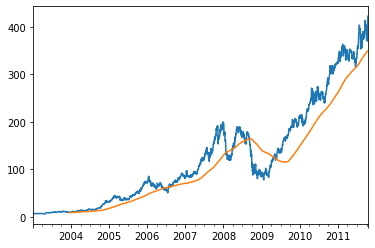

In [50]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot() # 滑动窗口的平均。类似于groupby 和 resample ,调用后可以调用统计函数。

In [51]:
# 一个问题，在开始阶段，我们数据可能少于window periods 怎么设置？？？
# min_periods 这个参数可以

appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

appl_std250[5:10]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
Freq: B, Name: AAPL, dtype: float64

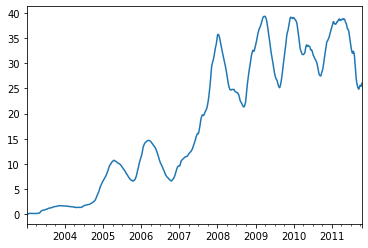

In [52]:
appl_std250.plot()

In [53]:
close_px.AAPL.rolling?
Signature: close_px.AAPL.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None)
Docstring:
Provide rolling window calculations.

Parameters
----------
window : int, offset, or BaseIndexer subclass
    Size of the moving window. This is the number of observations used for
    calculating the statistic. Each window will be a fixed size.

    If its an offset then this will be the time period of each window. Each
    window will be a variable sized based on the observations included in
    the time-period. This is only valid for datetimelike indexes.

    If a BaseIndexer subclass is passed, calculates the window boundaries
    based on the defined ``get_window_bounds`` method. Additional rolling
    keyword arguments, namely `min_periods`, `center`, and
    `closed` will be passed to `get_window_bounds`.
min_periods : int, default None
    Minimum number of observations in window required to have a value
    (otherwise result is NA). For a window that is specified by an offset,
    `min_periods` will default to 1. Otherwise, `min_periods` will default
    to the size of the window.
center : bool, default False
    Set the labels at the center of the window.
win_type : str, default None
    Provide a window type. If ``None``, all points are evenly weighted.
    See the notes below for further information.
on : str, optional
    For a DataFrame, a datetime-like column or MultiIndex level on which
    to calculate the rolling window, rather than the DataFrame's index.
    Provided integer column is ignored and excluded from result since
    an integer index is not used to calculate the rolling window.
axis : int or str, default 0
closed : str, default None
    Make the interval closed on the 'right', 'left', 'both' or
    'neither' endpoints.
    For offset-based windows, it defaults to 'right'.
    For fixed windows, defaults to 'both'. Remaining cases not implemented
    for fixed windows.

Returns
-------
a Window or Rolling sub-classed for the particular operation

See Also
--------
expanding : Provides expanding transformations.
ewm : Provides exponential weighted functions.

Notes
-----
By default, the result is set to the right edge of the window. This can be
changed to the center of the window by setting ``center=True``.

To learn more about the offsets & frequency strings, please see `this link
<https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases>`__.

The recognized win_types are:
win_types 指定统计方法，不指定默认算数平均。
* ``boxcar``
* ``triang``
* ``blackman``
* ``hamming``
* ``bartlett``
* ``parzen``
* ``bohman``
* ``blackmanharris``
* ``nuttall``
* ``barthann``
* ``kaiser`` (needs beta)
* ``gaussian`` (needs std)
* ``general_gaussian`` (needs power, width)
* ``slepian`` (needs width)
* ``exponential`` (needs tau), center is set to None.

If ``win_type=None`` all points are evenly weighted. To learn more about
different window types see `scipy.signal window functions
<https://docs.scipy.org/doc/scipy/reference/signal.html#window-functions>`__.

Examples
--------

>>> df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})
>>> df
     B
0  0.0
1  1.0
2  2.0
3  NaN
4  4.0

Rolling sum with a window length of 2, using the 'triang'
window type.

>>> df.rolling(2, win_type='triang').sum()
     B
0  NaN
1  0.5
2  1.5
3  NaN
4  NaN

Rolling sum with a window length of 2, using the 'gaussian'
window type (note how we need to specify std).

>>> df.rolling(2, win_type='gaussian').sum(std=3)
          B
0       NaN
1  0.986207
2  2.958621
3       NaN
4       NaN

Rolling sum with a window length of 2, min_periods defaults
to the window length.

>>> df.rolling(2).sum()
     B
0  NaN
1  1.0
2  3.0
3  NaN
4  NaN

Same as above, but explicitly set the min_periods

>>> df.rolling(2, min_periods=1).sum()
     B
0  0.0
1  1.0
2  3.0
3  2.0
4  4.0

A ragged (meaning not-a-regular frequency), time-indexed DataFrame

>>> df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]},
...                   index = [pd.Timestamp('20130101 09:00:00'),
...                            pd.Timestamp('20130101 09:00:02'),
...                            pd.Timestamp('20130101 09:00:03'),
...                            pd.Timestamp('20130101 09:00:05'),
...                            pd.Timestamp('20130101 09:00:06')])

>>> df
                       B
2013-01-01 09:00:00  0.0
2013-01-01 09:00:02  1.0
2013-01-01 09:00:03  2.0
2013-01-01 09:00:05  NaN
2013-01-01 09:00:06  4.0

Contrasting to an integer rolling window, this will roll a variable
length window corresponding to the time period.
The default for min_periods is 1.

>>> df.rolling('2s').sum()
                       B
2013-01-01 09:00:00  0.0
2013-01-01 09:00:02  1.0
2013-01-01 09:00:03  3.0
2013-01-01 09:00:05  NaN
2013-01-01 09:00:06  4.0
File:      /usr/local/lib/python3.6/dist-packages/pandas/core/generic.py
Type:      method

In [54]:
# 从上函数说明来看，最重要的三个参数： window，指定大小。  min_period :最小。
# win_type()

# expanding 从窗口从小到大，知道最后充满整个序列。

expending_mean = appl_std250.expanding().mean()

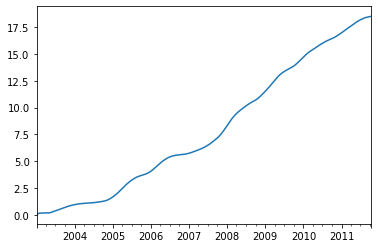

In [55]:
expending_mean.plot()

In [56]:
# 对于dataframe来说，进行rolling或者expendding，都是根据列来的。

close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


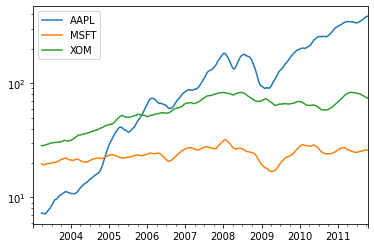

In [57]:
close_px.rolling(60).mean().plot(logy=True)

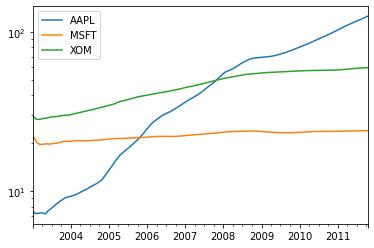

In [59]:
close_px.expanding().mean().plot(logy=True)

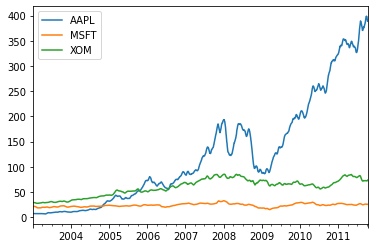

In [61]:
# 也可以传递 offset对象。
close_px.rolling('20D').mean().plot()

### Exponentially Weighted Functions

更重视近期的加权。

In [65]:
appl_px = close_px.AAPL['2006':'2007']

ma60 = appl_px.rolling(30, min_periods=20).mean()

ma60x = appl_px.rolling(30, min_periods=20)

ewma60 = appl_px.ewm(span=30).mean()


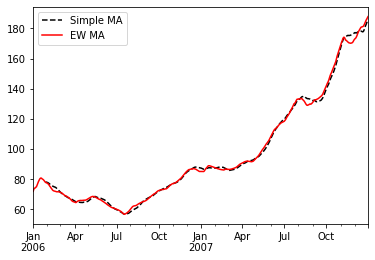

In [68]:
# 画图。
import matplotlib.pyplot as plt

ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='r-', label = 'EW MA')

plt.legend()
plt.show()

### Binary Moving Window Functions

In [69]:
# 计算苹果股票的滑动均值变化于标准普尔变化的相关性。

spx_px = close_px_all['SPX']

In [71]:
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

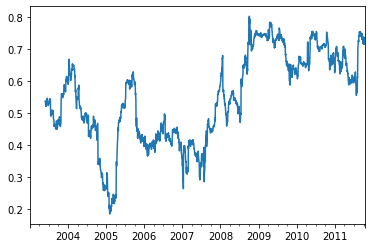

In [72]:
corr.plot()


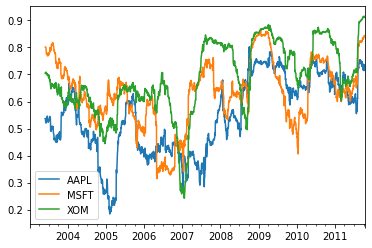

In [73]:
# 如果要一次计算很多类数据对标准普尔的相关数据呢。
# rolling_corr

corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions


用户自定义的，移动窗口函数。

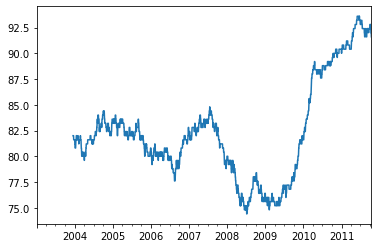

In [74]:
# 我们之前都是用的mean,sum函数，其实也可以自定义函数，要注意的就是，函数是从一个list返回一个标量即可。

from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
reslult = returns.AAPL.rolling(250).apply(score_at_2percent)
reslult.plot()

In [ ]:
 # 下一章节，继续前进，学习使用更加高级的方法，和一些模型库，比如statsmodels，scikit-learn.